#  **Estudio Hospitalizacion - Modelo de Machine Learning** 

## Modelo de Predicción de Hospitalización por Complicaciones Infecciosas Después de Biopsia Prostática

## *Objetivo del Proyecto:*

El objetivo del proyecto es identificar las características más relevantes de los pacientes que, tras someterse a una biopsia prostática, desarrollan complicaciones infecciosas que necesitan hospitalización en comparación con aquellos que no experimentan dichas complicaciones y, por lo tanto, no requieren hospitalización.

Para ello, se definió como "casos de hospitalización" a los pacientes que, después de someterse a una biopsia prostática, presentan fiebre, infección urinaria o sepsis en un plazo máximo de 30 días tras el procedimiento, lo que requiere atención médica ambulatoria u hospitalización para resolver la complicación. Por otro lado, se considera "control" a los pacientes que se sometieron a una biopsia prostática y no desarrollaron complicaciones infecciosas en el período de 30 días posterior al procedimiento.

Para ello, el departamento de datos ha recopilado Antecedentes del paciente, Morbilidad asociada al paciente y Antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas. Estos datos se encuentran en el archivo BBDD_Hospitalizacion.xlsx. El diccionario detallado de los datos se puede encontrar en el README.md del presente proyecto.

Lo que se busca es saber las características más importantes que tienen los pacientes de cierto tipo de enfermedad que terminan en hospitalización y crear un modelo predictivo de clasificación para la variable objetivo: **HOSPITALIZACION**.

## *Solución:*

### *1. Análisis Exploratorio de los Datos (EDA):* 

#### *1.1. Carga de base a datos:*

In [2]:
# Cargamos el archivo XLSX a un DataFrame a través de la librería de Pandas.
# Importamos Numpy para trabajar con arreglos.
# Importamos Matplotlib y Seaborn para desarrollar visualizaciones que nos van a permitir entender mejor los datos.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

df1 = pd.read_excel('BBDD_Hospitalización.xlsx')
df1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos que en total hay 570 registros y 20 columnas que son las variables iniciales dadas por el Hospital.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Vemos de que de los 570 registros, la variable que posee más nulos es "PATRON DE RESISTENCIA". De los 570 registros, 551 son not-null, es decir que tiene 19 valores nulos. Lo que normalmente se hace antes de ejecutar un dropna (Imputación de nulos) es revisar si se pueden recuperar estos datos con los dueños del negocio, si no se encuentra esta información, se explora la posibilidad de eliminar la variable del estudio y así no perder la información de estos 19 registros en las otras columnas. Por ahora, es muy pronto para tomar la decisión de eliminar esta columna y se debe realizar un analisis más profundo. En ese orden ideas, lo mejor es eliminar todas las filas que poseen al menos un nulo. 

#### *1.2. Eliminación de NaN y duplicados:*

In [4]:
# En el DataFrame mostrado anteriormente podemos ver que hay filas completamente llenas de NaN.  Vamos a eliminarlas.
df1.dropna(inplace=True)
df1.drop_duplicates(inplace=True)
df1

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,55.0,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
559,70.0,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
561,75.0,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
563,67.0,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


#### *1.3. Eliminación de variables irrelevantes:*

Eliminamos las siguientes variables:

 - DIAS HOSPITALIZACION MQ
 - DIAS HOSPITALIZACIÓN UPC

En el estudio nos interesa como variable respuesta si hubo hospitalización o no (Variable **HOSPITALIZACION**). Los días de hospitalización pueden usarse como material de estudio en caso de hacer preguntas posteriores, pero son irrelevantes para la pregunta de negocio actual.

In [5]:
columnas_a_eliminar = ['DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']

df1.drop(columns=columnas_a_eliminar,inplace=True)
df1

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,55.0,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO
559,70.0,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO
561,75.0,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO
563,67.0,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO


#### *1.4. Balanceo de la variable objetivo:*

Vemos que la variable **HOSPITALIZACION** es una variable dicotómica (Si-No). Por lo que es una buena práctica revisar qué tan balanceado tengo las clases de dicha variable. Esto es con el objetivo de saber si más adelante debo hacer un balanceo para asegurar un mejor rendimiento del modelo de Machine Learning.

También es bueno saber cuántos registros son positivos para la variable **HOSPITALIZACION** con el fin de revisar valores de variables que aparentemente tienen muy pocos registros pero podrían tener una gran influencia diferenciadora entre los casos positivos y negativos de hospitalización.

[Text(0.5, 1.0, 'Variable Objetivo Desbalanceada')]

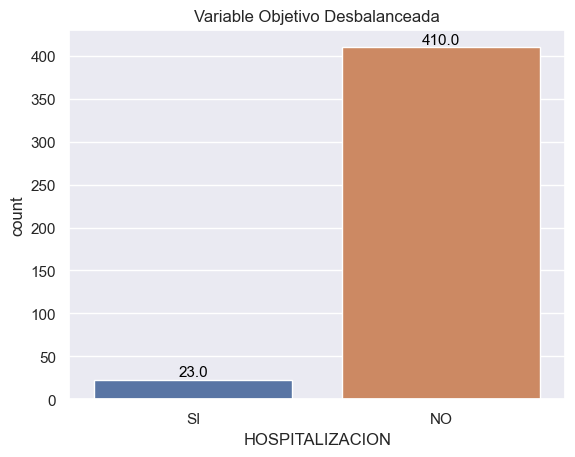

In [6]:
# Creamos un countplot para HOSPITALIZACION
ax = sns.countplot(x='HOSPITALIZACION', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

ax.set(title = 'Variable Objetivo Desbalanceada')

Vemos que efectivamente hay solo 23 pacientes que presentaron hospitalización y 410 que no (control). Eso indica que debemos tener cuidado con las variables que aparentemente son insignificantes pero que pueden tener un gran poder diferenciador en la variable objetivo. 

#### *1.5. Renombre de variables:*

Hay nombres muy largos en los encabezados de las columnas. Para facilitar la escritura del código es mejor tener nombres cortos pero igualmente intuitivos.

In [7]:
#Vamos a generar los sigueintes reemplazos en la variable ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS:

nuevos_nombres = {'NUMERO DE MUESTRAS TOMADAS': '# MUESTRAS',
                 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'DIAS PARA INFECCION',
                 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'ANTIBIOTICO'}

df1 = df1.rename(columns=nuevos_nombres)

df1

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,# MUESTRAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS PARA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,55.0,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO
559,70.0,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO
561,75.0,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO
563,67.0,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO


#### *1.6. Visualización de Variables Numéricas:*

Las variables numéricas son las siguientes:

- 'EDAD'
- 'PSA'
- '# MUESTRAS'
- 'DIAS PARA INFECCION'

a. Vamos a crear un Dataframe que contenga los valores de esta variable para poder hacer un gráfico tipo 'Pairplot' y visualizar su comportamiento.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


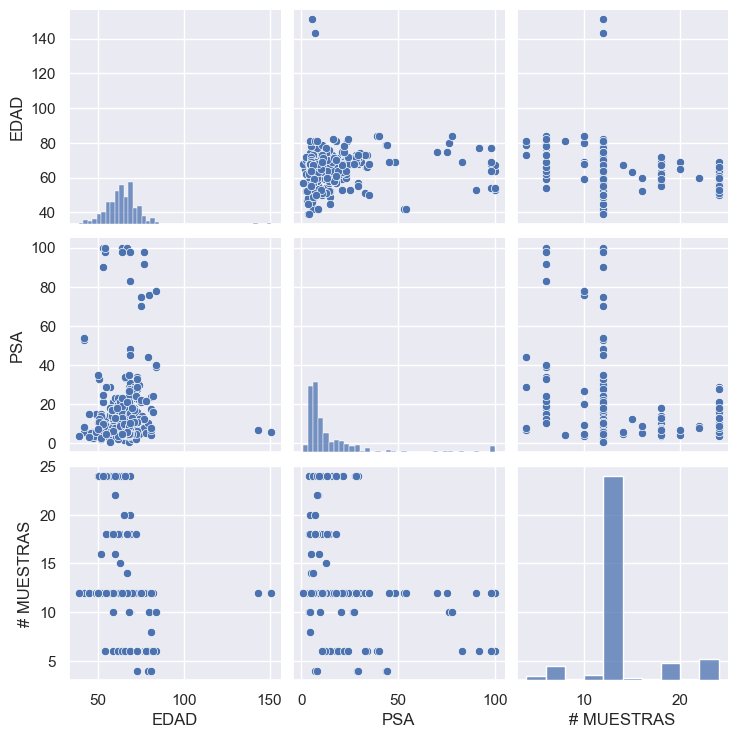

In [8]:
#Creamos el Dataframe de variables numéricas
dfNumerico  = df1[['EDAD','PSA','# MUESTRAS','DIAS PARA INFECCION']]
#Creamos el Pairplot
sns.pairplot(data=dfNumerico)

En el Pairplot podemos identificar varias cosas:

1. Hay dos registros con edades por encima de los 130 años. Esto es imposible y debe corregirse. Lo primero que debe hacerse el identificar si fue error de digitación y corregirlo. Sin embargo, debido a que no se tiene contacto con la persona qye digitó los datos, se procederá a eliminar estos registros del análisis.
2. En el Histograma para la variable 'EDAD' podemos apreciar que tiene forma de campana gausiana (retirando los valores erróneos), por lo que sería bueno hacer un test de normalidad y confirmar si sigue esta distribución estadística.
3. Vemos que la variable PSA presenta la forma de una campana gausiana pero que está sesgada hacia la derecha. Es decir, que la moda es menor que la mediana y hay mayor cantidad de datos entre 0 y 15 ng/mL. No obstante, también hay valores muy elevados en algunos registros, los cuales son datos posibles, que han ocurrido y deben estudiarse. Un nivel de PSA tan elevado es muy inusual y generalmente indica una afección médica significativa.
4. El número de muestras tomadas es una variable numérica discreta y la mayoría de registros son de 12 muestras tomadas. No tiene una distribución específica.
5. Los días para la infección después de la biopsia no salieron en el gráfico porque tiene cadenas de texto. Se deben transformar los datos que están como texto.
6. Por el momento no se puede apreciar una relación clara entre estas variables numéricas que permitan identificar redundancia y por lo tanto eliminar alguna de ellas.


#### *1.7. Transformación de Datos para Variables Numéricas:*

a. Vemos que la variable "DIAS PARA INFECCION" tiene unos valores como cadenas de texto (String). Vamos a cambiar el 'NO' y 'NO ' por 0.

In [9]:
df1['DIAS PARA INFECCION'] = df1['DIAS PARA INFECCION'].replace('NO ', 0)
df1['DIAS PARA INFECCION'] = df1['DIAS PARA INFECCION'].replace('NO', 0)
df1

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,# MUESTRAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS PARA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,55.0,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO
559,70.0,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO
561,75.0,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO
563,67.0,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO


b. Eliminamos los valores incorrectos para la variable 'EDAD'.

In [10]:
# Creamos una máscara para identificar las filas correspondientes a estos registros:

mascara = (df1.EDAD > 130)
df1[mascara]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,# MUESTRAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS PARA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
161,143.0,SI,NO,6.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO
181,151.0,NO,NO,5.7,NO,SI,OTROS,12.0,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO


In [11]:
# Eliminamos las filas 161 y 181 que tienen edades erróneas

filas_a_eliminar = [161, 181]
df1.drop(filas_a_eliminar, inplace=True)
df1

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,# MUESTRAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS PARA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,55.0,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO
559,70.0,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO
561,75.0,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO
563,67.0,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO


c. A partir de la limpieza de los datos de EDAD, vamos a revisar si tiene una distribución normal con un test de normalidad. 

In [12]:
import scipy.stats as stats

#Hacemos prueba de normalidad Kolmogorov-Smirnov para la variable EDAD que tiene más de 50 registros

stat, p_value = stats.kstest(df1['EDAD'], 'norm')

# Imprimir el resultado del test
print(f"Estadístico de prueba: {stat}, Valor p: {p_value}")

# Interpretación
alpha = 0.05
if p_value > alpha:
    print("La variable EDAD parece provenir de una distribución normal")
else:
    print("La variable EDAD no parece provenir de una distribución normal")

Estadístico de prueba: 1.0, Valor p: 0.0
La variable EDAD no parece provenir de una distribución normal


Se puede ver que a pesar de que se ve un comporamiento de campana Guassiana, estadísticamente no alcanza a tener una distribución normal. Más adelante vamos a hacer una normalización de los datos para poder tener un correcto balance entre variables para los modelos de Machine Learning.

#### *1.8. Transformación y Visualización de Variables Categóricas:*

a. Vemos que las variables categóricas en su mayoría están compuestas por Si y No. Vamos a hacer estas transformaciones para poder visualizar correctamente los datos.

In [13]:
df1['DIABETES'] = df1['DIABETES'].replace('SI', 1)
df1['DIABETES'] = df1['DIABETES'].replace('NO', 0)

df1['HOSPITALIZACIÓN ULTIMO MES'] = df1['HOSPITALIZACIÓN ULTIMO MES'].replace('SI', 1)
df1['HOSPITALIZACIÓN ULTIMO MES'] = df1['HOSPITALIZACIÓN ULTIMO MES'].replace('NO', 0)

df1['BIOPSIAS PREVIAS'] = df1['BIOPSIAS PREVIAS'].replace('SI', 1)
df1['BIOPSIAS PREVIAS'] = df1['BIOPSIAS PREVIAS'].replace('NO', 0)

df1['VOLUMEN PROSTATICO'] = df1['VOLUMEN PROSTATICO'].replace('SI', 1)
df1['VOLUMEN PROSTATICO'] = df1['VOLUMEN PROSTATICO'].replace('NO', 0)

df1['CUP'] = df1['CUP'].replace('SI', 1)
df1['CUP'] = df1['CUP'].replace('NO', 0)

df1['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df1['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI', 1)
df1['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df1['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('NO', 0)

df1['FIEBRE'] = df1['FIEBRE'].replace('SI', 1)
df1['FIEBRE'] = df1['FIEBRE'].replace('NO', 0)

df1['ITU'] = df1['ITU'].replace('SI', 1)
df1['ITU'] = df1['ITU'].replace('NO', 0)

df1['HOSPITALIZACION'] = df1['HOSPITALIZACION'].replace('SI', 1)
df1['HOSPITALIZACION'] = df1['HOSPITALIZACION'].replace('NO', 0)

df1

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,# MUESTRAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS PARA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
1,56.0,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
2,57.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1
3,56.0,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
4,55.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,55.0,0,0,5.0,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,ADENOCARCINOMA GLEASON 7,0,0,0,NO,NO,NO,0
559,70.0,1,0,18.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,0,0,0,NO,NO,NO,0
561,75.0,0,0,75.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,ADENOCARCINOMA GLEASON 8,0,0,0,NO,NO,NO,0
563,67.0,0,0,6.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,ADENOCARCINOMA GLEASON 6,0,0,0,NO,NO,NO,0


b. Vemos que aún nos faltan transformar las variables categóricas nominales. Para esto vamos a usar un CountPlot que nos permita identificar todas las categorías.

Empezamos con la variable ANTIBIOTICO:

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'FLUOROQUINOLONA_AMINOGLICOSIDO'),
  Text(1, 0, 'CEFALOSPORINA_AMINOGLUCOCIDO'),
  Text(2, 0, 'OROQUINOLONAS'),
  Text(3, 0, 'OTROS'),
  Text(4, 0, 'FLUOROQUINOLONA_AMINOGLICÓSIDO')])

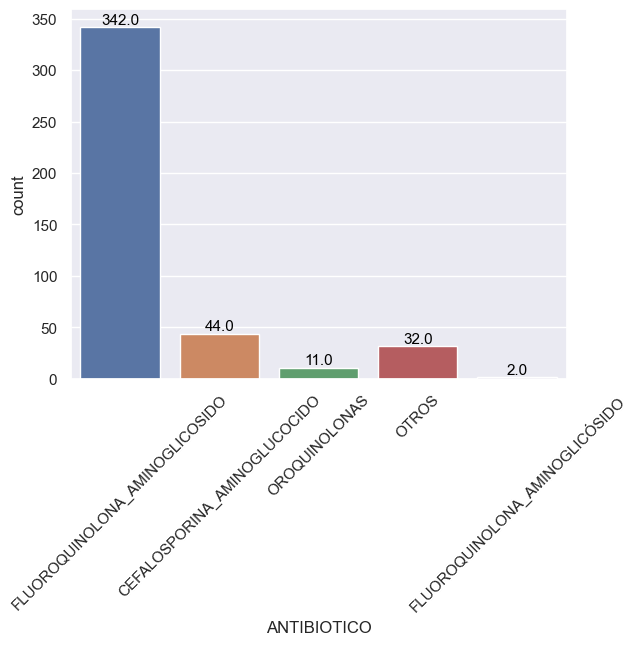

In [14]:
# Creamos un countplot para ANTIBIOTICO
ax = sns.countplot(x='ANTIBIOTICO', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)

Se pueden observar 5 categorías. Vamos a reemplazar los nombres de los antibioticos por algo más corto. Además vemos que FLUOROQUINOLONA_AMINOGLICOSIDO y FLUOROQUINOLONA_AMINOGLICÓSIDO solo se diferencian en una tilde.

Además vemos que en la mayoría de pacientes se usó FLUOROQUINOLONA_AMINOGLICÓSIDO (342 registros)

In [15]:
df1['ANTIBIOTICO'] = df1['ANTIBIOTICO'].replace('FLUOROQUINOLONA_AMINOGLICOSIDO', 'FA')
df1['ANTIBIOTICO'] = df1['ANTIBIOTICO'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FA')
df1['ANTIBIOTICO'] = df1['ANTIBIOTICO'].replace('CEFALOSPORINA_AMINOGLUCOCIDO', 'CA')
df1['ANTIBIOTICO'] = df1['ANTIBIOTICO'].replace('OROQUINOLONAS', 'OR')

df1

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,# MUESTRAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS PARA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,0,0,4.0,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
1,56.0,0,0,7.7,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
2,57.0,0,0,29.0,1,1,FA,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1
3,56.0,0,0,7.0,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
4,55.0,0,0,29.0,1,1,FA,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,55.0,0,0,5.0,0,0,FA,12.0,0,0,ADENOCARCINOMA GLEASON 7,0,0,0,NO,NO,NO,0
559,70.0,1,0,18.0,0,1,FA,12.0,0,0,NEG,0,0,0,NO,NO,NO,0
561,75.0,0,0,75.0,0,1,FA,12.0,0,0,ADENOCARCINOMA GLEASON 8,0,0,0,NO,NO,NO,0
563,67.0,0,0,6.0,0,1,FA,12.0,0,0,ADENOCARCINOMA GLEASON 6,0,0,0,NO,NO,NO,0


c. Seguimos analizando la variable BIOPSIA para identificar su número de categorías.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'NEG'),
  Text(1, 0, 'ADENOCARCINOMA GLEASON 6 '),
  Text(2, 0, 'ADENOCARCINOMA GLEASON 7 '),
  Text(3, 0, 'ADENOCARCINOMA GLEASON 6'),
  Text(4, 0, 'ADENOCARCINOMA GLEASON 10 '),
  Text(5, 0, 'ADENOCARCINOMA GLEASON 9 '),
  Text(6, 0, 'ADENOCARCINOMA GLEASON 8 '),
  Text(7, 0, 'PROSTATITIS'),
  Text(8, 0, 'ADENOCARCINOMA GLEASON 7'),
  Text(9, 0, 'HIPERPLASIA PROSTATICA'),
  Text(10, 0, 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS')])

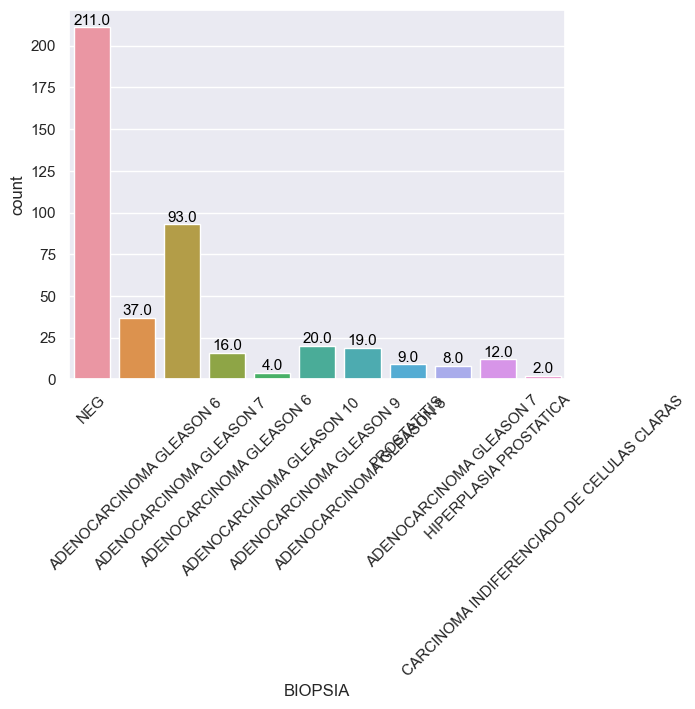

In [16]:
ax = sns.countplot(x='BIOPSIA', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)

Vemos que hay varias categorías que son las mismas pero tienen una pequeña diferencia en la escritura. Además para facilitar la lectura vamos a poner nombres más cortos.

Además, podemos ver que en la mayoría de casos el resultado de la biopsia salió negativa, que es lo esperado.

In [17]:
df1['BIOPSIA'] = df1['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 6 ', 'AG6')
df1['BIOPSIA'] = df1['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 6', 'AG6')
df1['BIOPSIA'] = df1['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 7 ', 'AG7')
df1['BIOPSIA'] = df1['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 7', 'AG7')
df1['BIOPSIA'] = df1['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 8 ', 'AG8')
df1['BIOPSIA'] = df1['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 9 ', 'AG9')
df1['BIOPSIA'] = df1['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 10 ', 'AG10')
df1['BIOPSIA'] = df1['BIOPSIA'].replace('PROSTATITIS', 'PR')
df1['BIOPSIA'] = df1['BIOPSIA'].replace('HIPERPLASIA PROSTATICA', 'HIP')
df1['BIOPSIA'] = df1['BIOPSIA'].replace('CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', 'CAR')

df1

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,# MUESTRAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS PARA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,0,0,4.0,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
1,56.0,0,0,7.7,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
2,57.0,0,0,29.0,1,1,FA,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1
3,56.0,0,0,7.0,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
4,55.0,0,0,29.0,1,1,FA,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,55.0,0,0,5.0,0,0,FA,12.0,0,0,AG7,0,0,0,NO,NO,NO,0
559,70.0,1,0,18.0,0,1,FA,12.0,0,0,NEG,0,0,0,NO,NO,NO,0
561,75.0,0,0,75.0,0,1,FA,12.0,0,0,AG8,0,0,0,NO,NO,NO,0
563,67.0,0,0,6.0,0,1,FA,12.0,0,0,AG6,0,0,0,NO,NO,NO,0


#### *1.9. Eliminación de variables para el modelo de Machine Learning:*

Ahora que ya tenemos todos los datos transformados, vamos a hacer una evaluación más exhaustiva de cada una de las variables y revisar si realmente tienen un impacto en los casos en los que la variable **HOSPITALIZACION** toma el valor de 1.

a. Variable TIPO DE CULTIVO:

(array([0, 1, 2, 3]),
 [Text(0, 0, 'NO'),
  Text(1, 0, 'HEMOCULTIVO'),
  Text(2, 0, 'UROCULTIVO'),
  Text(3, 0, 'HEMOCULTIVO Y UROCULTIVO')])

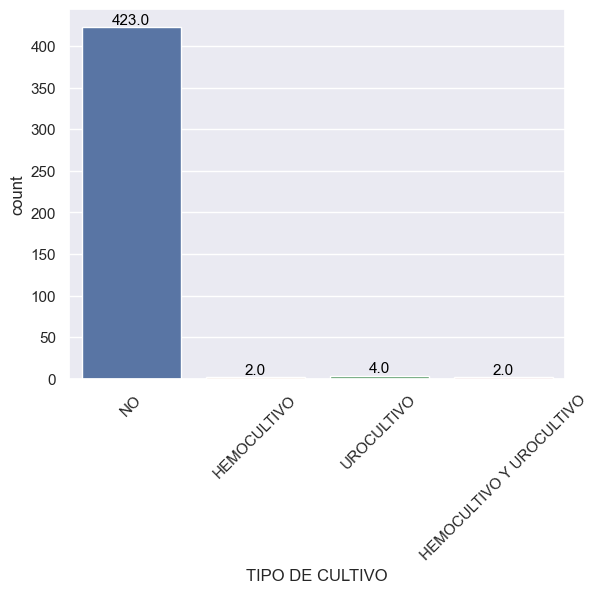

In [18]:
ax = sns.countplot(x='TIPO DE CULTIVO', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)

Vemos que son muchos casos en los que se no se tiene un tipo de cultivo. Esto tiene sentido porque solo habrá un tipo de cultivo para los pacientes que presentaron una infección, lo cual podría tener una fuerte relación con que fue hospitalizado. Vamos a revisar si estos 8 registros en los que hubo un tipo de cultivo solo se encuentran en los 23 casos de hospitalización:

In [19]:
#Creamos una máscara para visualizar solo los 23 registros en los que hubo hospitalización.
mascHospitalizacion = (df1.HOSPITALIZACION == 1)
dfHosp = df1[mascHospitalizacion]
#Resgistros en los que hubo hospitalización.
dfHosp

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,# MUESTRAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS PARA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,0,0,4.00,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
1,56.0,0,0,7.70,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
2,57.0,0,0,29.00,1,1,FA,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1
3,56.0,0,0,7.00,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
4,55.0,0,0,29.00,1,1,FA,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1
5,55.0,1,1,4.00,0,1,FA,12.0,0,0,NEG,2,0,0,NO,NO,NO,1
6,53.0,0,0,7.00,0,1,FA,12.0,0,0,NEG,2,1,1,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",1
7,67.0,0,0,6.20,0,1,FA,12.0,0,0,NEG,2,1,1,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",1
8,69.0,0,0,6.00,0,0,FA,12.0,0,0,NEG,2,1,0,NO,NO,NO,1
10,54.0,0,0,7.70,0,1,FA,12.0,0,0,NEG,2,1,1,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",1


In [20]:
dfHosp['TIPO DE CULTIVO']

0                           NO
1                           NO
2                  HEMOCULTIVO
3                           NO
4                  HEMOCULTIVO
5                           NO
6                   UROCULTIVO
7     HEMOCULTIVO Y UROCULTIVO
8                           NO
10                  UROCULTIVO
11    HEMOCULTIVO Y UROCULTIVO
12                          NO
13                          NO
14                          NO
15                          NO
16                          NO
17                          NO
18                          NO
19                          NO
20                          NO
21                          NO
22                  UROCULTIVO
23                  UROCULTIVO
Name: TIPO DE CULTIVO, dtype: object

Efectivamente vemos que los 8 rgistros de TIPO DE CULTIVO se encuentran en los casos de hospitalación. Esto tiene sentido porque esta variable es una consecuencia de la infección que finalmente acabará en un caso de hospitalización. Por lo cual, no es una variable que debamos considerar como predictiva a la hora de hacer nuestro modelo de Machine Learning. 

b. Variable PATRON DE RESISTENCIA:

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'NO'),
  Text(1, 0, ' AMPI R, CIPRO R, GENTA R, SULFA M R'),
  Text(2, 0, 'RESISTENTE A AMPI, CIPRO Y GENTA'),
  Text(3, 0, 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA'),
  Text(4, 0, 'MULTI SENSIBLE')])

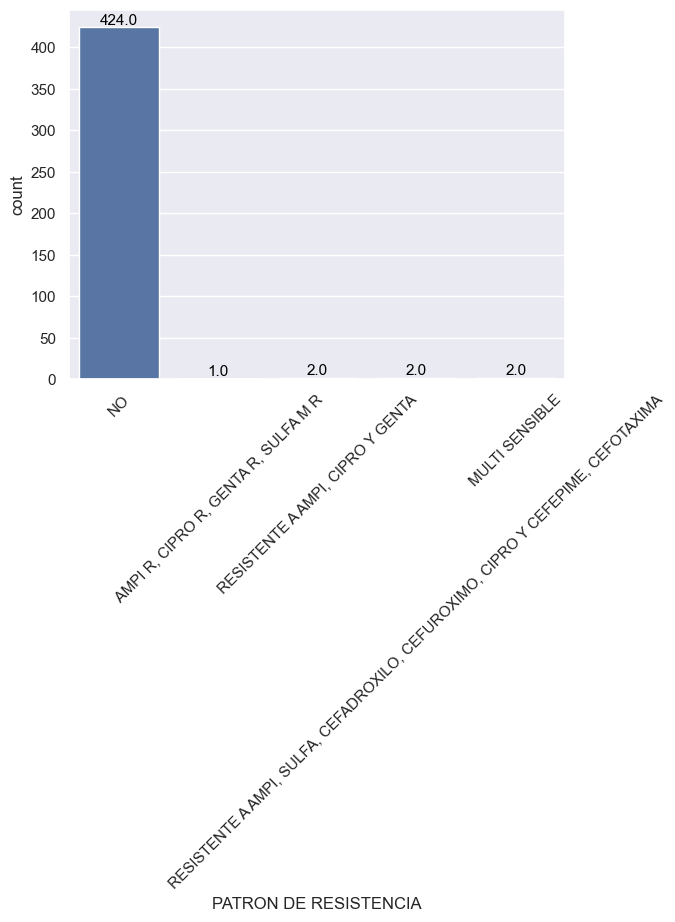

In [21]:
#Hacemos lo mismo para PATRON DE RESISTENCIA
ax = sns.countplot(x='PATRON DE RESISTENCIA', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)

Vemos un caso similar al de PATRON DE CULTIVO. El patrón de resistencia es algo que se obtiene a partir de una bacteria determinada. Si no hay bacterias, no tiene sentido hablar de un patrón de resistencia para ese registro. Y si hay bacterias, seguramente habrá infección y por consiguiente hospitalización. Sin embargo vamos a confirmarlo revisando los 23 registros con hospitalización.

In [22]:

dfHosp[['TIPO DE CULTIVO','PATRON DE RESISTENCIA']]

,TIPO DE CULTIVO,PATRON DE RESISTENCIA
0,NO,NO
1,NO,NO
2,HEMOCULTIVO,"AMPI R, CIPRO R, GENTA R, SULFA M R"
3,NO,NO
4,HEMOCULTIVO,NO
5,NO,NO
6,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA"
7,HEMOCULTIVO Y UROCULTIVO,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX..."
8,NO,NO
10,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA"


Efectivamente vemos que los 7 registros para la variable PATRON DE RESISTENCIA son diferentes a "NO" cuando hay un TIPO DE CULTIVO. Por esta razón, también se considera que no es una variable explicativa para mis casos de hospitalización y no debemos usarla en nuestro modelo de Machine Learning.

c. Variable AGENTE AISLADO:

(array([0, 1, 2]),
 [Text(0, 0, 'NO'),
  Text(1, 0, 'E.COLI'),
  Text(2, 0, 'PSEUDOMONAS AERUGINOSA')])

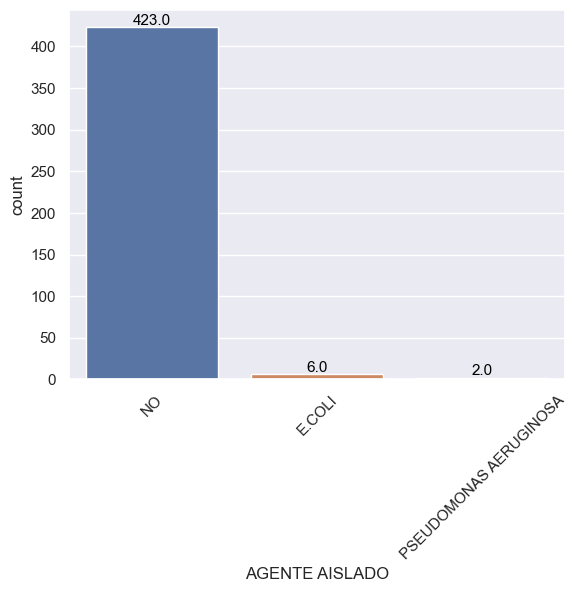

In [23]:
#Hacemos lo mismo con AGENTE AISLADO
ax = sns.countplot(x='AGENTE AISLADO', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)


Otra vez vemos un caso similar a los anteriores, solo 8 registros que seguramente estarán dentro de los 23 casos de hospitalización. Vamos a confirmarlo:

In [24]:
dfHosp[['TIPO DE CULTIVO','PATRON DE RESISTENCIA','AGENTE AISLADO']]

,TIPO DE CULTIVO,PATRON DE RESISTENCIA,AGENTE AISLADO
0,NO,NO,NO
1,NO,NO,NO
2,HEMOCULTIVO,"AMPI R, CIPRO R, GENTA R, SULFA M R",E.COLI
3,NO,NO,NO
4,HEMOCULTIVO,NO,E.COLI
5,NO,NO,NO
6,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA",E.COLI
7,HEMOCULTIVO Y UROCULTIVO,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",E.COLI
8,NO,NO,NO
10,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA",E.COLI


Efectivamente sucede lo mismo. La variable AGENTE AISLADO hace referencia a la bacteria encontrada. Esto es un resultado que se obtiene después de haber generado la infección y por lo tanto, la hospitalización. En otras palabras, es algo que se obtiene cuando el paciente ya esta hospitalizado, por lo que tampoco es una variable que me permite precedir si un paciente va a ser hospitalizado o no después de haberse realizado la biopsia. Por esta razón, lo mejor es eliminar esta variable de mi modelo de Machine Learning. Más adelante, se podrá usar para otros análisis posteriores a la hospitalización.

d. Conjunto de Variables Dicotómicas:

In [25]:
#Ahora vamos a analizar las variables dicotómicas
dfDico = df1[['DIABETES','HOSPITALIZACIÓN ULTIMO MES','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO','CUP',
                'ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE','ITU','HOSPITALIZACION']]
dfDico


,DIABETES,HOSPITALIZACIÓN ULTIMO MES,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU,HOSPITALIZACION
0,0,0,0,1,0,0,1,0,1
1,0,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0,1
3,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
558,0,0,0,0,0,0,0,0,0
559,1,0,0,1,0,0,0,0,0
561,0,0,0,1,0,0,0,0,0
563,0,0,0,1,0,0,0,0,0


Hacemos un Pairplot para verificar histogramas de cada variable:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


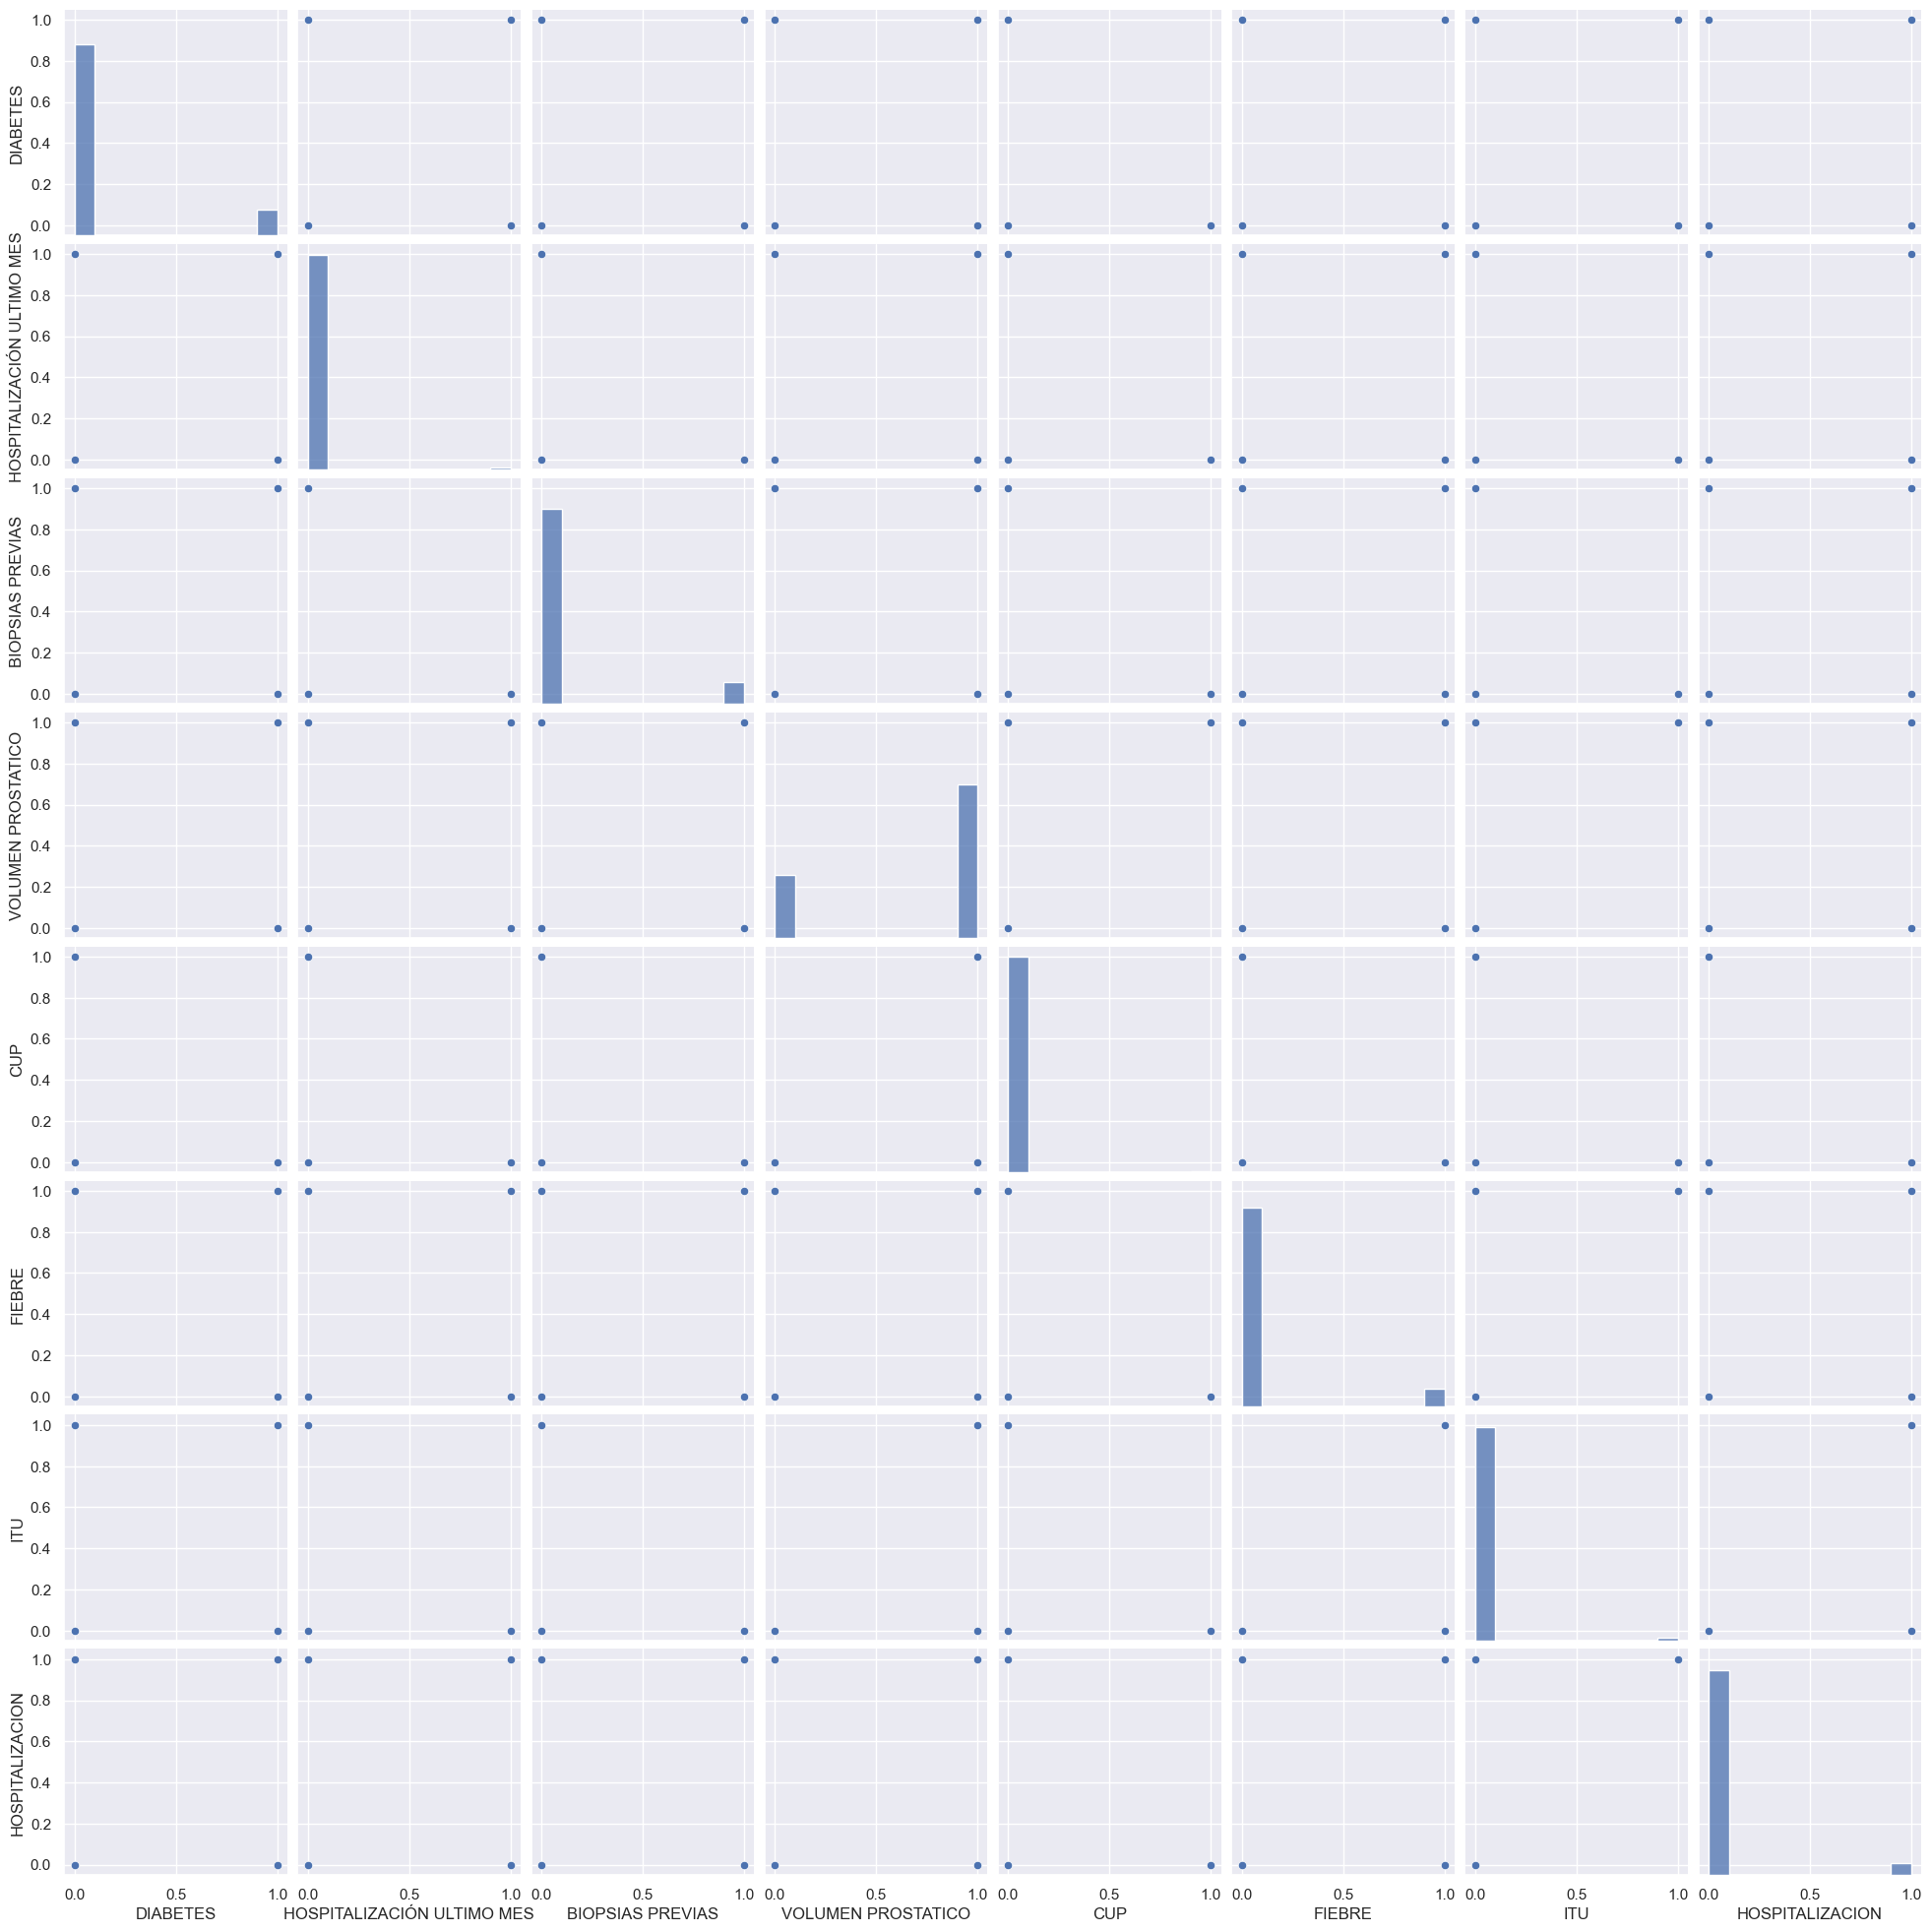

In [26]:
sns.pairplot(data=dfDico)

Lo primero que podemos ver es que no salió la variable ENF. CRONICA PULMONAR OBSTRUCTIVA, por lo que vamos a revisar los registros en los que tiene valores diferentes a 0.

Por otro lado, en los histogramas vemos que hay variables que casi no tienen valores en algunas de las 2 clases, están muy desbalanceadas. Vamos a analizarlas más adelante.

Vemos que la variable VOLUMEN PROSTATICO posee una cantidad de valores considerables en ambas clases, por lo que vamos a dejarla para el modelo de Machine Learning.

In [27]:
mascEnfPulm = df1['ENF. CRONICA PULMONAR OBSTRUCTIVA']!=0
df1[mascEnfPulm]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,# MUESTRAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS PARA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
27,77.0,0,0,91.8,0,1,FA,6.0,0,"SI, EPOC",AG10,0,0,0,NO,NO,NO,0
28,75.0,0,0,21.0,0,1,FA,12.0,0,"SI, EPOC",AG7,0,0,0,NO,NO,NO,0
29,77.0,0,0,98.0,0,1,FA,6.0,0,"SI, EPOC",AG10,0,0,0,NO,NO,NO,0
30,73.0,0,0,7.5,0,1,CA,12.0,0,"SI, ASMA",NEG,0,0,0,NO,NO,NO,0
33,63.0,0,0,10.5,0,0,FA,12.0,0,"SI, ASMA",AG7,0,0,0,NO,NO,NO,0
34,53.0,0,0,90.0,0,1,CA,12.0,0,1,AG9,0,0,0,NO,NO,NO,0
35,75.0,1,0,5.1,0,1,FA,12.0,0,1,AG6,0,0,0,NO,NO,NO,0
36,62.0,0,0,16.0,0,1,OR,12.0,0,1,AG8,0,0,0,NO,NO,NO,0
37,69.0,0,0,17.0,1,1,CA,12.0,0,1,NEG,0,0,0,NO,NO,NO,0
38,71.0,0,0,23.0,0,0,FA,12.0,0,1,AG6,0,0,0,NO,NO,NO,0


Vemos que los pacientes que presentan enferemedad cronica pulmonar (14 registros) no fueron hospitalizados, por lo que no genera valor a mi modelo de Machine Learning.  Vamos a eliminar también esta variable más adelante.

e. Variable HOSPITALIZACIÓN ULTIMO MES:

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

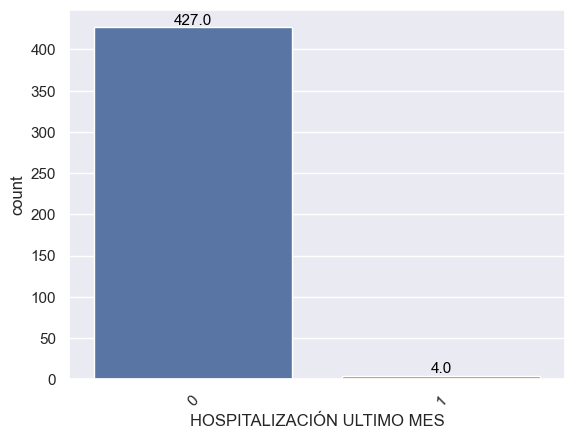

In [28]:
ax = sns.countplot(x='HOSPITALIZACIÓN ULTIMO MES', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)

Solo aparecen 4 casos. Vamos a ver si están en los casos de hospitalzación.

In [29]:
dfHosp['HOSPITALIZACIÓN ULTIMO MES']

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
Name: HOSPITALIZACIÓN ULTIMO MES, dtype: int64

Vemos que solo hay un caso en los pacientes hospitalizados, por lo que está varaible no nos servirá como explicativa en el modelo de Machine Learning. Lo mejor es eliminarla del estudio.

f. Variable CUP:

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

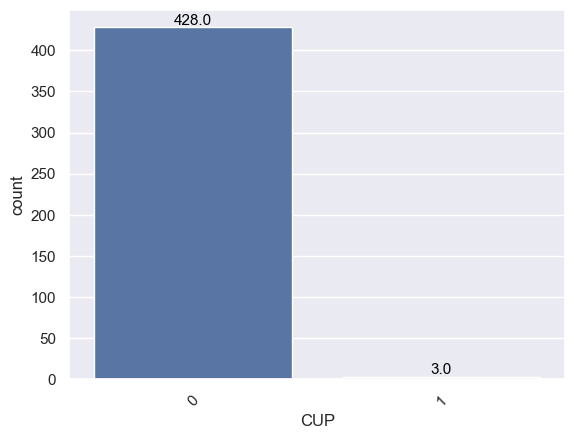

In [30]:
ax = sns.countplot(x='CUP', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)

Solo aparecen 3 casos. Vamos a ver si están en los casos de hospitalzación.

In [31]:
dfHosp['CUP']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
Name: CUP, dtype: int64

Los casos de CUP no aparecen en los datos de hospitalización, por lo que es mejor eliminar esta variable. No aporta
valor en el modelo de Machine Learning.

g. Variable ITU:

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

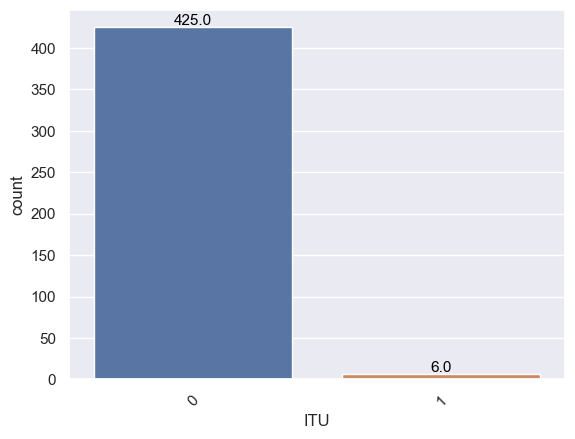

In [32]:
ax = sns.countplot(x='ITU', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)

Solo aparecen 6 casos. Vamos a ver si están en los casos de hospitalzación.

In [33]:
dfHosp['ITU']

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     0
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
23    1
Name: ITU, dtype: int64

La variable ITU es redundante porque si presenta infección del tracto urinario, va para hospitalización. Los 6 casos se encuentran en los 23 registros de hospitalización. Eso también nos lo dice el pairplot entre ITU y Hospitalización. 

Vamos a anlizarla junto con los datos de cultivos de bacterias:

In [34]:
dfHosp[['TIPO DE CULTIVO','PATRON DE RESISTENCIA','AGENTE AISLADO','ITU']]

,TIPO DE CULTIVO,PATRON DE RESISTENCIA,AGENTE AISLADO,ITU
0,NO,NO,NO,0
1,NO,NO,NO,0
2,HEMOCULTIVO,"AMPI R, CIPRO R, GENTA R, SULFA M R",E.COLI,0
3,NO,NO,NO,0
4,HEMOCULTIVO,NO,E.COLI,0
5,NO,NO,NO,0
6,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA",E.COLI,1
7,HEMOCULTIVO Y UROCULTIVO,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",E.COLI,1
8,NO,NO,NO,0
10,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA",E.COLI,1


Efectivamente esta variable ITU tiene el valor de 1 (positivo para infección en el tracto urinario) cuando hay presencia de bacterias. De este modo, es algo que está muy relacionado con la infección que finalmente causó la hospitalación. Lo que debemos entender con el modelo de Machine Learning es qué pudo haber causado esa infección. Para esto debemos buscar un modelo con el menor ruido posible. Por consiguiente, vamos a proceder a eliminar la variable ITU más adelante también.

h. Variable FIEBRE:

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

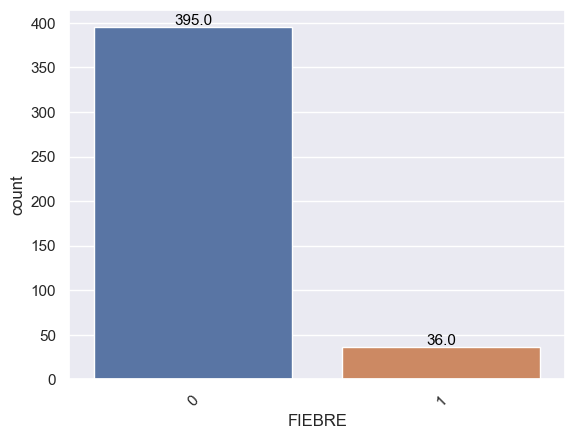

In [35]:
ax = sns.countplot(x='FIEBRE', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)

Aparecen 36 casos con fiebre. Vamos a ver si están en los casos de hospitalzación y de una vez vamos a compararlos con los registros que prensentan información bacteriana.

In [36]:
dfHosp[['FIEBRE','TIPO DE CULTIVO','PATRON DE RESISTENCIA','AGENTE AISLADO','ITU']]

,FIEBRE,TIPO DE CULTIVO,PATRON DE RESISTENCIA,AGENTE AISLADO,ITU
0,1,NO,NO,NO,0
1,1,NO,NO,NO,0
2,1,HEMOCULTIVO,"AMPI R, CIPRO R, GENTA R, SULFA M R",E.COLI,0
3,1,NO,NO,NO,0
4,1,HEMOCULTIVO,NO,E.COLI,0
5,0,NO,NO,NO,0
6,1,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA",E.COLI,1
7,1,HEMOCULTIVO Y UROCULTIVO,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",E.COLI,1
8,1,NO,NO,NO,0
10,1,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA",E.COLI,1


Vemos que la variable FIEBRE tiene 20 de los 36 registros entre los 23 casos de hospitalización, por lo que podría considerarse como una variable redundante que tiene una alta correlación con la variable HOSPITALIZACION, por lo que no 
aporta valor a mi estudio de Machine Learning. La fiebre es algo que está muy relacionado a la hospitalización. Es una consecuencia de la infección que finalmente termina en hospitalización. Vamos a eliminar esta variable junto con las anteriores.

i. Variable DIABETES:

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

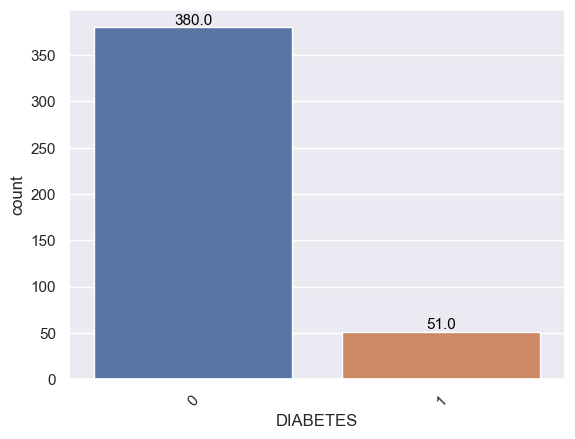

In [37]:
ax = sns.countplot(x='DIABETES', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)

Aparecen 51 casos con diabetes. Vamos a ver si están en los casos de hospitalzación.

In [38]:
dfHosp[['DIABETES','FIEBRE','TIPO DE CULTIVO','PATRON DE RESISTENCIA','AGENTE AISLADO','ITU']]

,DIABETES,FIEBRE,TIPO DE CULTIVO,PATRON DE RESISTENCIA,AGENTE AISLADO,ITU
0,0,1,NO,NO,NO,0
1,0,1,NO,NO,NO,0
2,0,1,HEMOCULTIVO,"AMPI R, CIPRO R, GENTA R, SULFA M R",E.COLI,0
3,0,1,NO,NO,NO,0
4,0,1,HEMOCULTIVO,NO,E.COLI,0
5,1,0,NO,NO,NO,0
6,0,1,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA",E.COLI,1
7,0,1,HEMOCULTIVO Y UROCULTIVO,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",E.COLI,1
8,0,1,NO,NO,NO,0
10,0,1,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA",E.COLI,1


Vemos que de los 51 pacientes que presentan diabetes, solo 5 aparecen en los casos de hospitalización, por lo que nos da a pensar de que no es una variable con mucha influencia en la clasificación de pacientes hospitalizados y los que no. Sin embargo, vamos a dejarla para el modelo de Machine Learning para confirmar que efectivamente no va a tener mucho peso para predecir pacientes hospitalizados.

j. Variable BIOPSIAS PREVIAS:

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

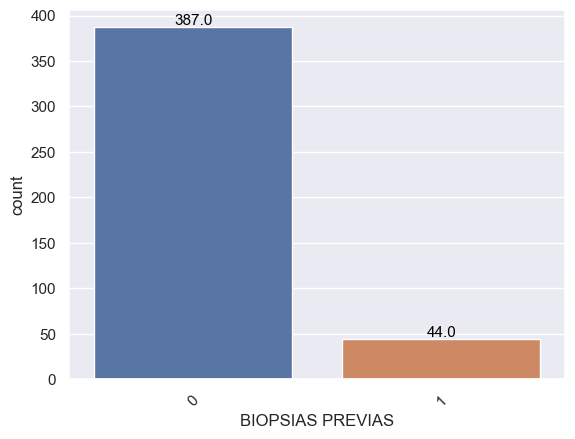

In [39]:
ax = sns.countplot(x='BIOPSIAS PREVIAS', data=df1)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)

Aparecen 44 casos con biopsias previas. Vamos a ver si están en los casos de hospitalzación.

In [40]:
dfHosp[['BIOPSIAS PREVIAS','DIABETES','FIEBRE','TIPO DE CULTIVO','PATRON DE RESISTENCIA','AGENTE AISLADO','ITU']]

,BIOPSIAS PREVIAS,DIABETES,FIEBRE,TIPO DE CULTIVO,PATRON DE RESISTENCIA,AGENTE AISLADO,ITU
0,0,0,1,NO,NO,NO,0
1,0,0,1,NO,NO,NO,0
2,1,0,1,HEMOCULTIVO,"AMPI R, CIPRO R, GENTA R, SULFA M R",E.COLI,0
3,0,0,1,NO,NO,NO,0
4,1,0,1,HEMOCULTIVO,NO,E.COLI,0
5,0,1,0,NO,NO,NO,0
6,0,0,1,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA",E.COLI,1
7,0,0,1,HEMOCULTIVO Y UROCULTIVO,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",E.COLI,1
8,0,0,1,NO,NO,NO,0
10,0,0,1,UROCULTIVO,"RESISTENTE A AMPI, CIPRO Y GENTA",E.COLI,1


Vemos que de los 44 pacientes que presentan biopsias previas, solo 2 aparecen en los casos de hospitalización, por lo que nos da a pensar de que no es una variable con mucha influencia en la clasificación de pacientes hospitalizados y los que no. Vamos a proceder a aliminarla más adelante.

k. Variables Categoricas (BIOPSIA y ANTIBIOTICO):

Vamos a analizar estas dos variables categóricas en los 23 casos en los que se presentó hospitalización:

In [41]:
dfHosp

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,# MUESTRAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS PARA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,0,0,4.00,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
1,56.0,0,0,7.70,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
2,57.0,0,0,29.00,1,1,FA,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1
3,56.0,0,0,7.00,0,1,FA,12.0,0,0,NEG,1,1,0,NO,NO,NO,1
4,55.0,0,0,29.00,1,1,FA,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1
5,55.0,1,1,4.00,0,1,FA,12.0,0,0,NEG,2,0,0,NO,NO,NO,1
6,53.0,0,0,7.00,0,1,FA,12.0,0,0,NEG,2,1,1,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",1
7,67.0,0,0,6.20,0,1,FA,12.0,0,0,NEG,2,1,1,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",1
8,69.0,0,0,6.00,0,0,FA,12.0,0,0,NEG,2,1,0,NO,NO,NO,1
10,54.0,0,0,7.70,0,1,FA,12.0,0,0,NEG,2,1,1,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",1


También podemos eliminar el resultado de la BIOPSIA porque vemos que la mayoría de datos son negativos y los 4 registros diferentes a negativo son AG6 y AG7 que son los más frecuentes en los que no presentaron Hospitalización, después de los Negativos. Esto me indica que esta variable no es la adecuada para realizar una correcta clasificación entre los casos de hospitalización y los que no tuvieron hospitalización.

Igualmente vemos que el antibiotico usado en la mayoría de casos de  hospitalización es FA, que es el más frecuente en los
casos en los que no hubo hospitalización. Esto nos indica que es una variable que no nos va a aportar mucho valor en nuestro modelo predictivo de Machine Learning.

En conclusión, vamos a eliminar del modelo las siguientes variables:

- HOSPITALIZACIÓN ULTIMO MES 
- CUP
- ITU
- ENF. CRONICA PULMONAR OBSTRUCTIVA
- FIEBRE
- TIPO DE CULTIVO
- PATRON DE RESISTENCIA
- AGENTE AISLADO
- BIOPSIA
- ANTIBIOTICO
- BIOPSIAS PREVIAS

In [42]:
columnas_a_eliminar = ['HOSPITALIZACIÓN ULTIMO MES','CUP','ITU','ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE',
                        'TIPO DE CULTIVO','PATRON DE RESISTENCIA','AGENTE AISLADO','BIOPSIA','ANTIBIOTICO','BIOPSIAS PREVIAS']

df1.drop(columns=columnas_a_eliminar,inplace=True)
df1

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,# MUESTRAS,DIAS PARA INFECCION,HOSPITALIZACION
0,53.0,0,4.0,1,12.0,1,1
1,56.0,0,7.7,1,12.0,1,1
2,57.0,0,29.0,1,24.0,1,1
3,56.0,0,7.0,1,12.0,1,1
4,55.0,0,29.0,1,24.0,1,1
...,...,...,...,...,...,...,...
558,55.0,0,5.0,0,12.0,0,0
559,70.0,1,18.0,1,12.0,0,0
561,75.0,0,75.0,1,12.0,0,0
563,67.0,0,6.0,1,12.0,0,0


#### *1.10. Matriz de Correlación:*

Ahora que ya tenemos el Data Set sin variables que no aportan valor a mi modelo predictivo de clasificación de Machine Learning, vamos a proceder a realizar una gráfica de correlaciones para verificar redundancia entre variables.

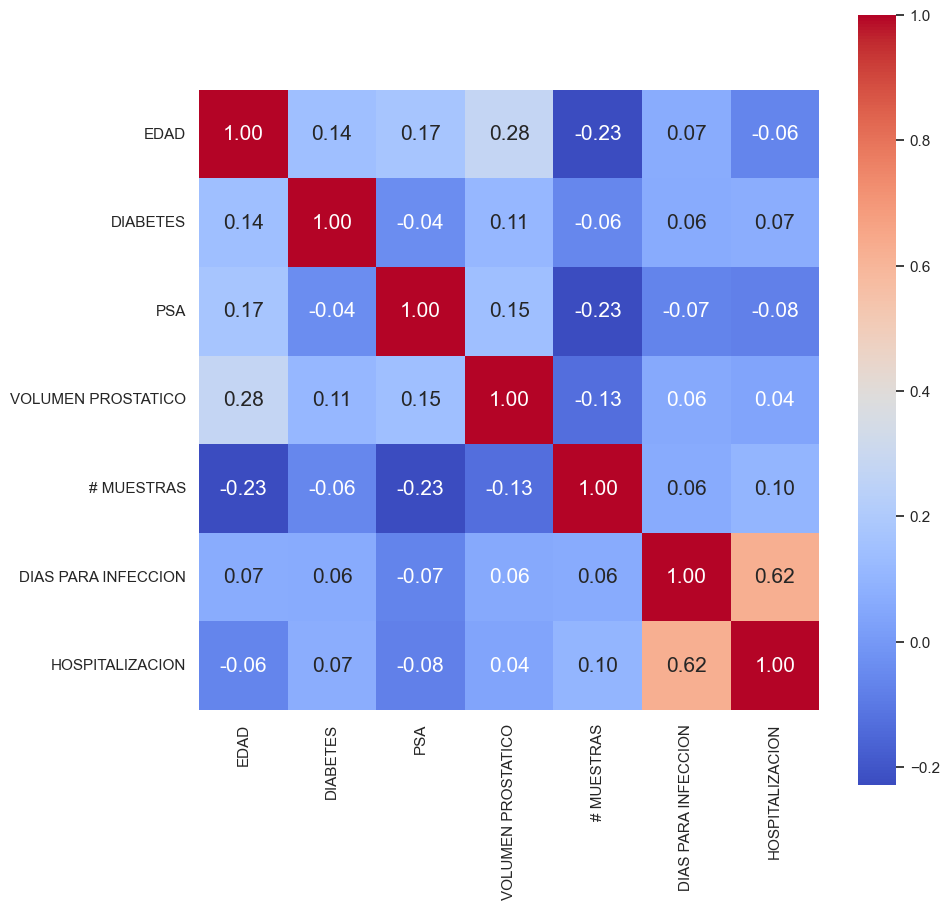

In [43]:
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df1.columns,
           yticklabels= df1.columns,
           cmap= 'coolwarm')
plt.show()

Vemos que entre DIAS PARA INFECCION y HOSPITALIZACION hay una correlación de 0.62. Vamos a revisarlo con más profundidad mediante un Join Plot:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:2214: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


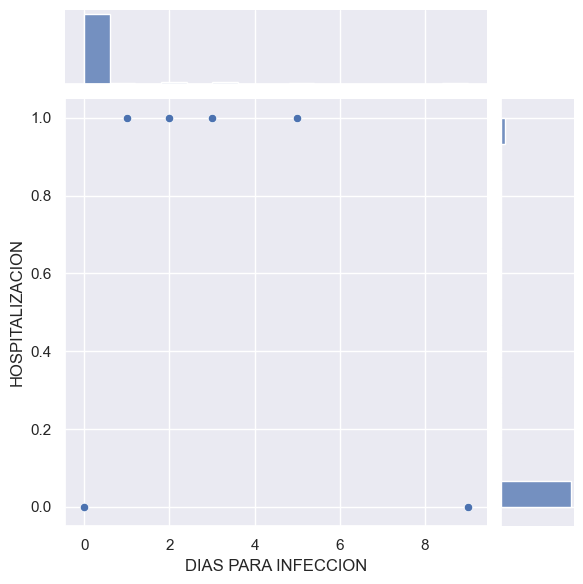

In [44]:
sns.jointplot(x="DIAS PARA INFECCION", y="HOSPITALIZACION", marginal_kws=dict(bins=15, rug=True), data=df1)

Se puede ver que los días en los que se presenta una complicación infecciosa y termina en hospitalización, son los que son mayores a cero. El caso de 9 días en los que no se presentó hospitalización, me da a pensar que es un dato atípico que no tiene sentido. Vamos a revisarlo:

In [45]:
mascDiasMayores8 = df1['DIAS PARA INFECCION'] > 8
df1[mascDiasMayores8]

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,# MUESTRAS,DIAS PARA INFECCION,HOSPITALIZACION
24,77.0,0,10.0,1,12.0,9,0
25,75.0,0,9.0,1,12.0,9,0


Vemos que son dos casos que efectivamente no presentaron hospitalización. Si eliminaramos estos dos registros por ser atípicos, seguramente la correlación entre las variables DIAS PARA INFECCION y HOSPITALIZACION sería más alta. Esto tiene mucho sentido porque si se presentan días para que se presente una complicación infecciosa, habrá hospitalización. Es una variable redundante que no aporta valor a mi modelo de Machine Learning, por lo que vamos a proceder con su eliminación.

In [46]:
columnas_a_eliminar = ['DIAS PARA INFECCION']
df1.drop(columns=columnas_a_eliminar,inplace=True)

#### *1.10. Data Set Limpio para Machine Learning:*

Finalmente, el Data Set que vamos a usar para el entrenamiento y testeo del modelo de Machine Learning es el siguiente:

In [47]:
df1

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,# MUESTRAS,HOSPITALIZACION
0,53.0,0,4.0,1,12.0,1
1,56.0,0,7.7,1,12.0,1
2,57.0,0,29.0,1,24.0,1
3,56.0,0,7.0,1,12.0,1
4,55.0,0,29.0,1,24.0,1
...,...,...,...,...,...,...
558,55.0,0,5.0,0,12.0,0
559,70.0,1,18.0,1,12.0,0
561,75.0,0,75.0,1,12.0,0
563,67.0,0,6.0,1,12.0,0


#### *1.11. Exportación a archivo CSV:*

Se exporta el data set final a un archivo CSV para que pueda usarse en la creación del modelo de Machine Learning.

In [48]:
# Exportar el DataFrame a un archivo CSV
df1.to_csv('DSLimpioHospitalizacion.csv', index=False)